In [13]:
from textblob import TextBlob as tb
import sys

# Traducción de texto con 'textblob'
### Se necesita conexión a internet

In [16]:
from textblob import TextBlob as tb
#

# Creamos un texto en ingles
ingles = tb('Remember, Amreica : organization will set you free.')

# la libreria dedecta el idioma en el que esta escrito
print(ingles.translate(to='es'))

print(''.center(40,'-'))

ingles2 = tb('Hi, i hope you are doing ok')
print(ingles2.translate(to='es'))

print(''.center(40,'-'))


Recuerda, Amreica: la organización te hará libre.
----------------------------------------
Hola espero que estés bien
----------------------------------------


# Detección de sentimientos con textblob

#### potencial para clasificación de RIESGO VITAL, Se entrena con el archivo .json

In [17]:
# importamos la libreria 
from textblob.classifiers import NaiveBayesClassifier
import json

# debo tener varios ejemplos que muestre diferentes sentimientos
# para que sea más robusto y se alimente mejor
fp = open('datossp.json')
print(fp.read())

print(''.center(40,'-'))

fp = open('datossp.json')
cl = NaiveBayesClassifier(fp, format="json")
print('1.',cl.classify("mal pizza:(")) # detecta la palabra 'mal'
print('2.',cl.classify("no  pizza:(")) # no detecta la palabra 'no' sola, saca por defecto 'pos'
print('3.',cl.classify("pizza:(")) # cuando no entiende algo, saca por defecto 'pos'
print('4.',cl.classify("malo pizza:(")) # tampoco reconoce la palabra 'malo'
print('5.',cl.classify("no vuelvo a comer pizza:("))


# lo que no reconoce, pasa por defecto el primer label, creo

[
    {"text": "Amo este sandwich.", "label": "pos"},
    {"text": "Es un lugar adorable!", "label": "pos"},
    {"text": "No me gusta este restaurant","label":"neg"},
    {"text": "No vuelvo a regresar a este lugar :(","label":"neg"},
    {"text": "Me encantÃ³ <3 la comida","label":"pos"},
    {"text": "Todo muy mal :(","label":"neg"}
    

]

----------------------------------------
1. neg
2. pos
3. pos
4. pos
5. neg


# Analisis de sentimientos con Textblob
### para poder evaluarlo, se necesita traducir al ingles

In [18]:
from textblob import TextBlob as tb

try:
    # POSITIVA Y SUBJETIVA
    # ========================================
    t = tb("El telofono Xperia de Sony, tiene una pantalla de excelente resolución, ademas es muy rapido")
    # para poder evaluarlo, se necesita traducir al ingles
    t_in = t.translate(to='en')
    print(t_in)
    # analizamos los sentimientos 
    print(t_in.sentiment,'\n') # teniendo a t_in como TextBlob

    # Ahora quitaremos algunos calificativos 
    t = tb("El telofono Xperia de Sony, tiene una pantalla con buena resolución, ademas es rapido")
    # para poder evaluarlo, se necesita traducir al ingles
    t_in = t.translate(to='en')
    print(t_in)
    # analizamos los sentimientos 
    print(t_in.sentiment,'\n') # teniendo a t_in como TextBlob

    # OBJETIVO
    # ========================================
    t = tb('este programa, de acuerdo al estandar hace todos los calculos necesarios')
    t_in = t.translate(to='en')
    print(t_in)
    print(t_in.sentiment,'\n') # tiene subjetividad 0.5

    t = tb('este programa, de acuerdo al estandar hace todos los calculos bien')
    t_in = t.translate(to='en')
    print(t_in)
    print(t_in.sentiment,'\n') # tiene subjetividad 0

    # NEGATIVO
    # ========================================
    t = tb('No me gusta')
    t_in = t.translate(to='en')
    print(t_in)
    print(t_in.sentiment,'\n') # a pesar de ser negativa y totalmente subjetiva, arroja 0.0 y 0.0

    t = tb('No me gusta la pizza')
    t_in = t.translate(to='en')
    print(t_in)
    print(t_in.sentiment,'\n')  # a pesar de ser negativa y totalmente subjetiva, arroja 0.0 y 0.0

    t = tb('No me gusta la pizza, creo que es muy fea')
    t_in = t.translate(to='en')
    print(t_in)
    print(t_in.sentiment,'\n')

    t = tb('Creo que es muy fea')
    t_in = t.translate(to='en')
    print(t_in)
    print(t_in.sentiment,'\n')

    t = tb(' muy fea')
    t_in = t.translate(to='en')
    print(t_in)
    print(t_in.sentiment,'\n')

    t = tb('fea')
    t_in = t.translate(to='en')
    print(t_in)
    print(t_in.sentiment,'\n')
except:
    print(sys.exc_info()[0])

The Sony Xperia phone has an excellent resolution screen, it is also very fast
Sentiment(polarity=0.63, subjectivity=0.89) 

The Sony Xperia phone has a screen with good resolution, it is also fast
Sentiment(polarity=0.44999999999999996, subjectivity=0.6000000000000001) 

This program, according to the standard, does all the necessary calculations
Sentiment(polarity=0.0, subjectivity=0.5) 

this program, according to the standard, does all the calculations well
Sentiment(polarity=0.0, subjectivity=0.0) 

Dislike
Sentiment(polarity=0.0, subjectivity=0.0) 

I do not like pizza
Sentiment(polarity=0.0, subjectivity=0.0) 

I don't like pizza, I think it's very ugly
Sentiment(polarity=-0.9099999999999999, subjectivity=1.0) 

I think it's very ugly
Sentiment(polarity=-0.9099999999999999, subjectivity=1.0) 

very ugly
Sentiment(polarity=-0.9099999999999999, subjectivity=1.0) 

ugly
Sentiment(polarity=-0.7, subjectivity=1.0) 



# Analisis de sentimientos de un DataFrame

In [19]:
import pandas as pd
from textblob import TextBlob as tb
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('nyt.csv') # importamos el datasets
# df['text_esp'] = df['content'].apply(lambda x: tb(x).translate(to='es'))
df['Polarity'] = df['content'].apply(lambda x : tb(x).sentiment[0])
df['Subjetivity'] = df['content'].apply(lambda x : tb(x).sentiment[1])
df

,content,Polarity,Subjetivity
0,If the choice is between mining for bitcoin - ...,-0.150000,0.250000
1,"<br/>To me, Bitcoin (et al) appears to be an e...",-0.107143,0.471429
2,Bitcoin is a pyramid scheme backed by nothing ...,0.008566,0.415734
3,What does it cost in energy to dig up and refi...,0.146892,0.598589
4,You forgot to mention stock buybacks.,0.000000,0.000000
...,...,...,...
234,This is no different than his pre-November 201...,0.000000,0.550000
235,"Frankly, I am slightly confused, not about the...",0.161111,0.408333
236,more proof that the Twitiot sees everything in...,0.488889,0.500000
237,While the NYT focuses on the tweets from Ameri...,0.316667,0.416667


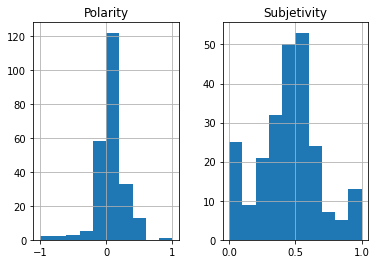

In [20]:
df.hist();

In [21]:
df.describe()

,Polarity,Subjetivity
count,239.000000,239.000000
mean,0.059614,0.449711
std,0.219413,0.238127
min,-1.000000,0.000000
25%,-0.012500,0.321240
50%,0.035714,0.466667
75%,0.161556,0.577110
max,1.000000,1.000000


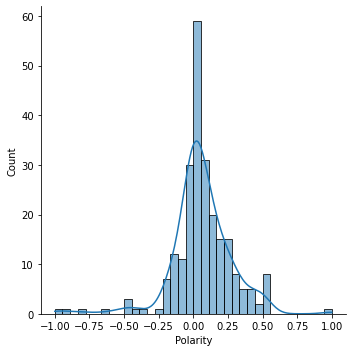

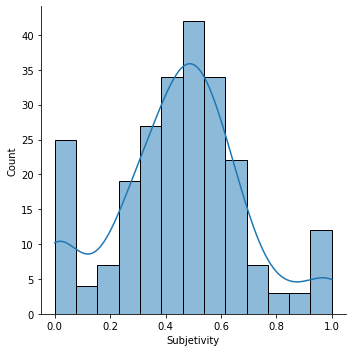

In [22]:
sns.displot(df['Polarity'], kde=True)
sns.displot(df['Subjetivity'], kde=True);

In [24]:
text_sample = '''Este es un texto de prueba, quiero ver como funciona el tokenizer de nltk. 
 que hago para eso? simplemente copio este mensaje de prueba y ¡BOOM!. veamos como funciona'''

text = tb(text_sample)

In [26]:
# Separar el texto por palabras 
text.words

WordList(['Este', 'es', 'un', 'texto', 'de', 'prueba', 'quiero', 'ver', 'como', 'funciona', 'el', 'tokenizer', 'de', 'nltk', 'que', 'hago', 'para', 'eso', 'simplemente', 'copio', 'este', 'mensaje', 'de', 'prueba', 'y', '¡BOOM', 'veamos', 'como', 'funciona'])

In [27]:
# separar el texto por oraciones
text.sentences

[Sentence("Este es un texto de prueba, quiero ver como funciona el tokenizer de nltk."),
 Sentence("que hago para eso?"),
 Sentence("simplemente copio este mensaje de prueba y ¡BOOM!."),
 Sentence("veamos como funciona")]